In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
# Create an SVM classifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()

# Create a Pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Print the first 5 rows
print(df.head())




   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [16]:
print(iris.feature_names)
print(iris.target_names)

df['target'] = iris.target
print(df.head())

print(df[df.target==1].head())
print(df[df.target==2].head())

df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
print(df.head())


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
50                7.0               3.2                4.7               1.4   
51                6.4               3.2                4.5               1.5   
52                6.9               3.1                4.9               1.5   
53            

In [6]:
# Filter the dataset to include only Setosa (class 0) and Versicolor (class 1)
X = iris.data[iris.target != 2, :2]  # Use only the first two features and classes 0 and 1
y = iris.target[iris.target != 2]

In [7]:
# Preprocess the dataset (Standardizing the features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [9]:
# Take input from the user for the last training point
print("Enter the values for Sepal Length and Sepal Width (scaled):")
sepal_length = float(input("Sepal Length: "))
sepal_width = float(input("Sepal Width: "))

# Update the last data point in X_train with the user input
X_train[-1] = (sepal_length, sepal_width)


Enter the values for Sepal Length and Sepal Width (scaled):


In [10]:



clf = SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [11]:
# Predict the class of the user input
user_input_class = clf.predict([(sepal_length, sepal_width)])

# Output the predicted class for the user input
if user_input_class == 0:
    print("The input corresponds to Setosa.")
else:
    print("The input corresponds to Versicolor.")

The input corresponds to Versicolor.


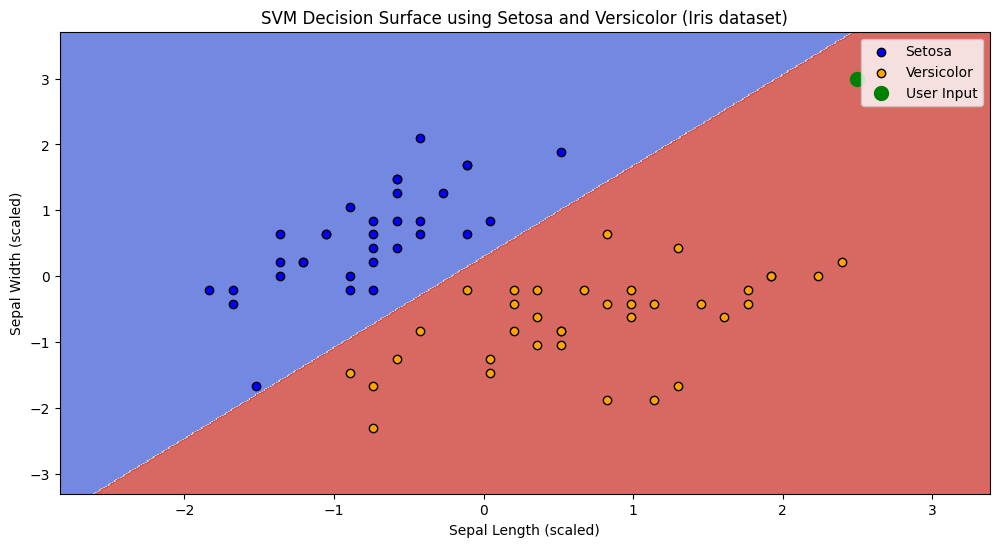

In [19]:
plt.figure(figsize=(12, 6))

# Create a mesh to plot 
h = .02  # step size in the mesh
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict class labels for each point in the mesh
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision surface
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the training points with labels
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='blue', label='Setosa', edgecolors='k')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='orange', label='Versicolor', edgecolors='k')

# Highlight the user input point
plt.scatter(sepal_length, sepal_width, color='green', s=100, label='User Input', marker='o')

plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('SVM Decision Surface using Setosa and Versicolor (Iris dataset)')
plt.legend()
plt.show()

In [13]:
# Evaluate the model
print("Model Accuracy: ", clf.score(X_test, y_test))

Model Accuracy:  1.0
